# Q4-Problem Statement:
Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm Dataset

Link: https://www.kaggle.com/datasets/henrysue/online-shoppers-intention

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Data Loading

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Data Understanding

In [4]:
types = df.dtypes; nulls = df.isna().sum(); null_percent = df.isna().sum()/len(df)*100
column_summary = pd.concat([types,nulls,null_percent], axis = 1)
column_summary.columns = ['data_type', 'null_count', 'null_percent']
print(column_summary)

                        data_type  null_count  null_percent
Administrative              int64           0           0.0
Administrative_Duration   float64           0           0.0
Informational               int64           0           0.0
Informational_Duration    float64           0           0.0
ProductRelated              int64           0           0.0
ProductRelated_Duration   float64           0           0.0
BounceRates               float64           0           0.0
ExitRates                 float64           0           0.0
PageValues                float64           0           0.0
SpecialDay                float64           0           0.0
Month                      object           0           0.0
OperatingSystems            int64           0           0.0
Browser                     int64           0           0.0
Region                      int64           0           0.0
TrafficType                 int64           0           0.0
VisitorType                object       

# Calculating target column

In [5]:
df['Weekend']=df['Weekend'].astype(str)
df['Revenue']=df['Revenue'].astype(str)

In [6]:
l = list()
for weekend, revenue in zip(df['Weekend'], df['Revenue']):
    if weekend == 'True' and revenue == 'True':
        l.append('weekend_revenue')
    elif weekend == 'False' and revenue == 'True':
        l.append('non_weekend_revenue')
    else :
        l.append('no_revenue')
df['target']=l

# Data Analysis

In [7]:
df_num= df.select_dtypes(include=np.number)
df_category=df.select_dtypes(include='O')

## Univariate Analysis

### Numerical Data Analysis

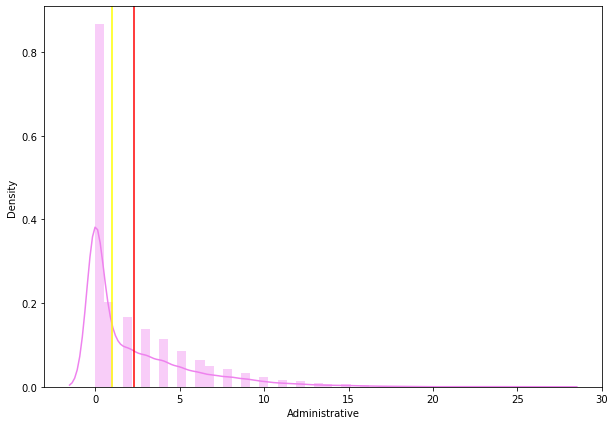

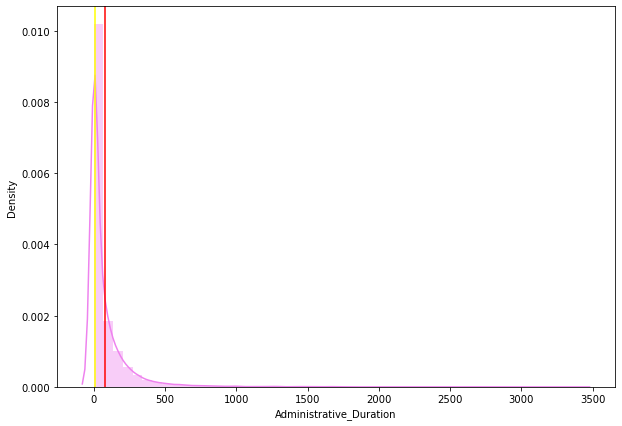

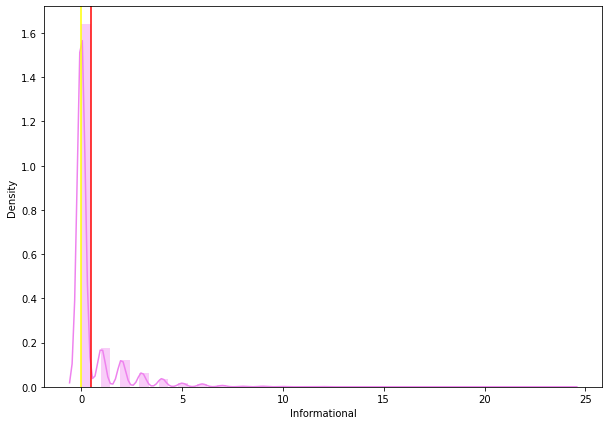

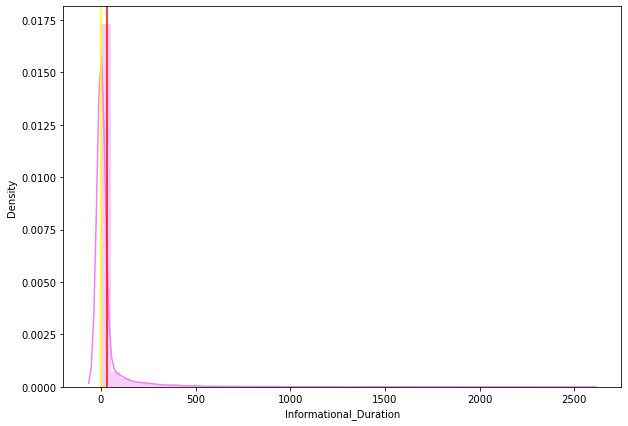

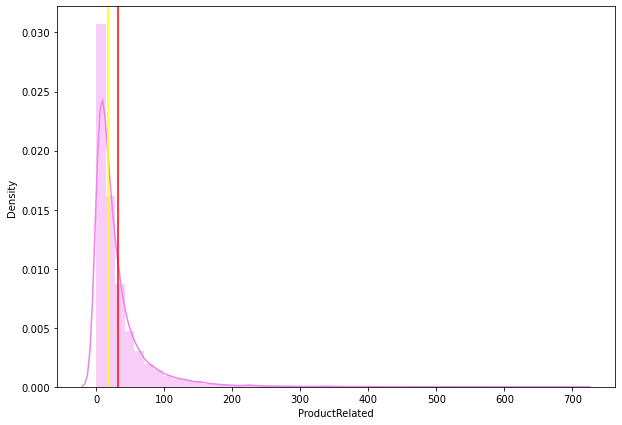

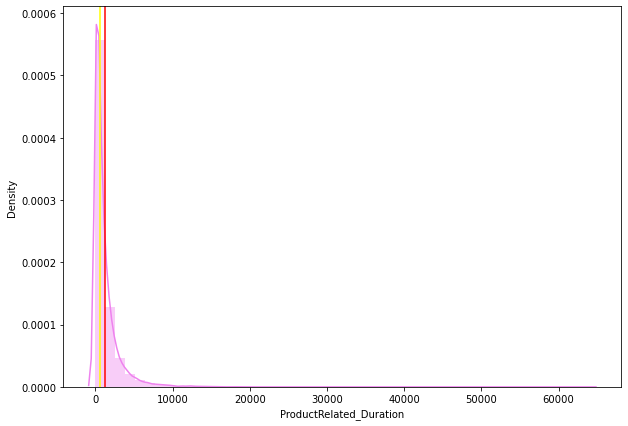

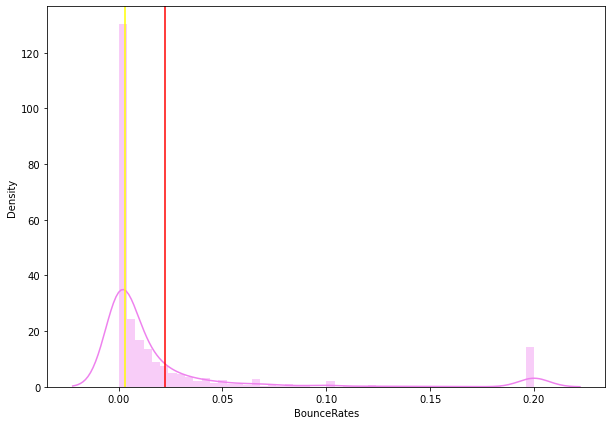

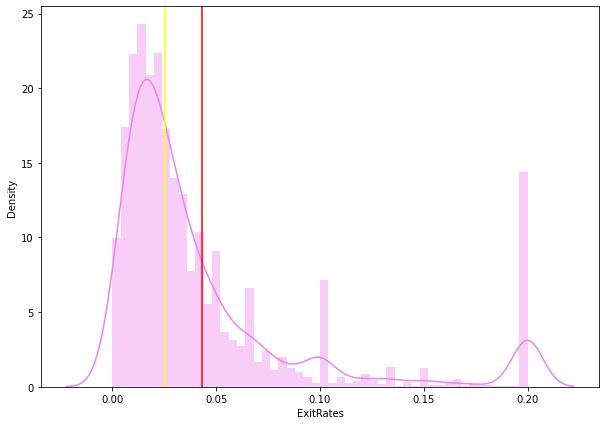

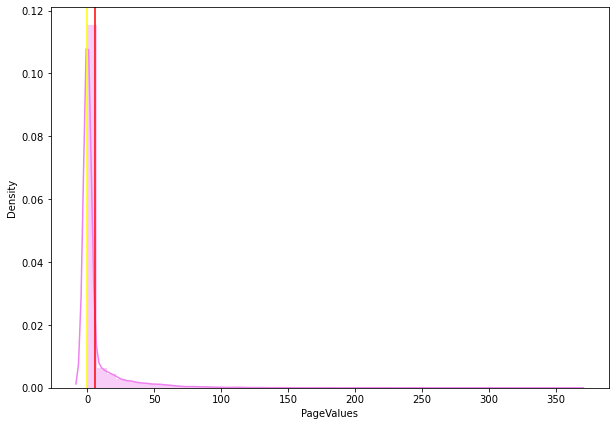

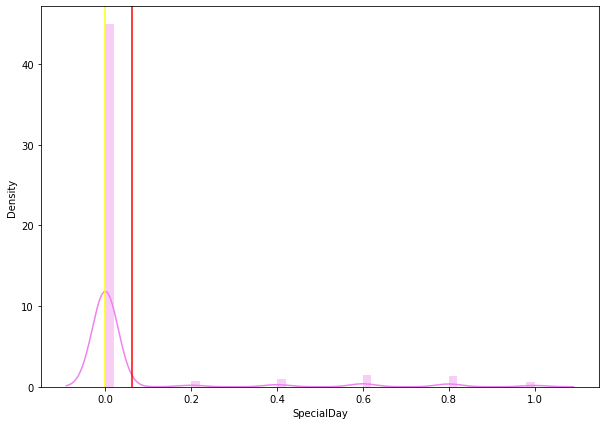

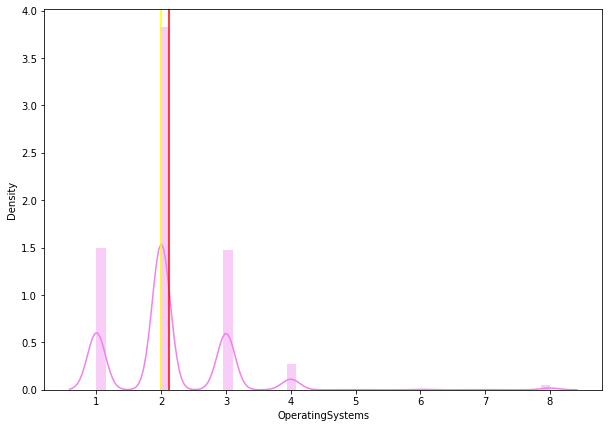

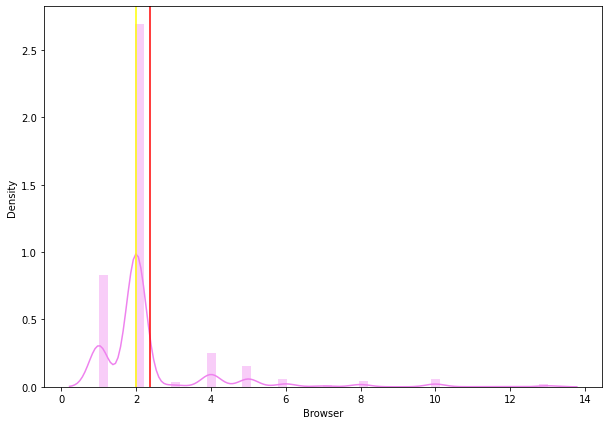

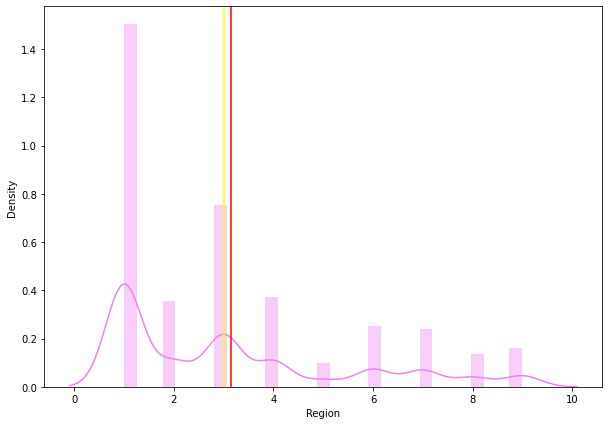

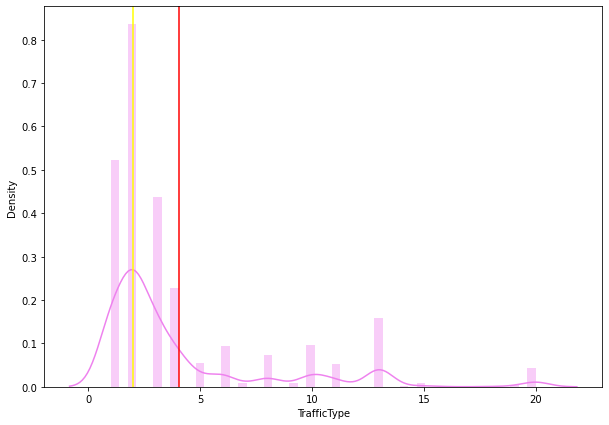

In [8]:
for i in df_num.columns:
    plt.figure(figsize =(10,7))
    sns.distplot(df_num[i], color = 'violet')
    plt.axvline(x = np.mean(df_num[i]), color = 'red')
    plt.axvline(x = np.median(df_num[i]), color = 'yellow')
    plt.show()

### Categorical Data

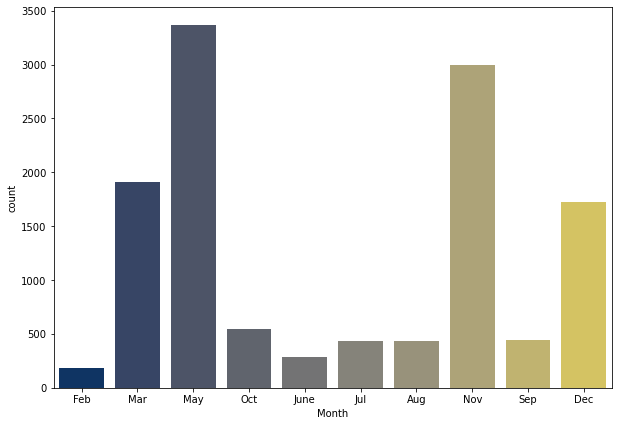

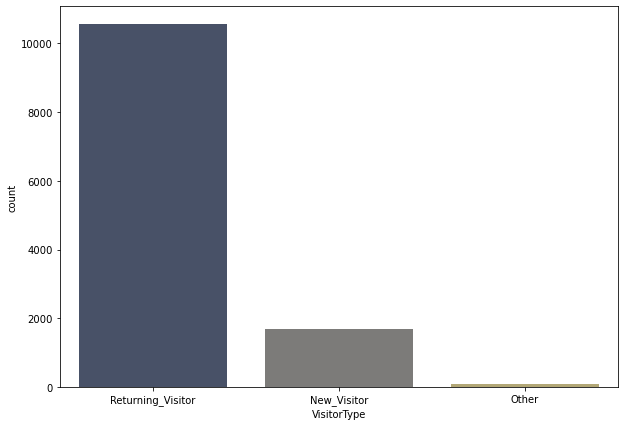

In [9]:
for i in df_category.drop(['Weekend', 'Revenue', 'target'], axis = 1):
    plt.figure(figsize =(10,7))
    sns.countplot(df_category[i], palette='cividis')
    plt.show()

### Target Variable Understanding

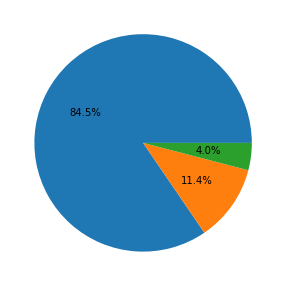

In [10]:
plt.figure(figsize=(10,5))
plt.pie(df.target.value_counts(), autopct='%1.1f%%')
plt.show()

In [11]:
df.target.value_counts()

no_revenue             10422
non_weekend_revenue     1409
weekend_revenue          499
Name: target, dtype: int64

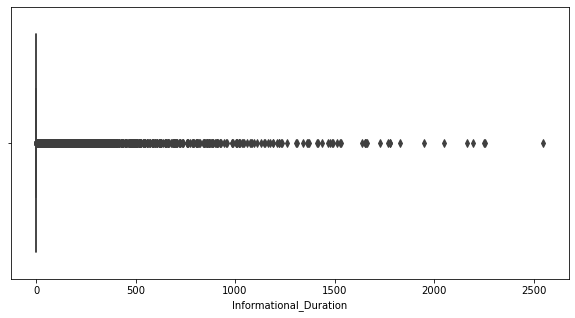

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Informational_Duration'])
plt.show()

## Bivariate Analysis

### Numeric

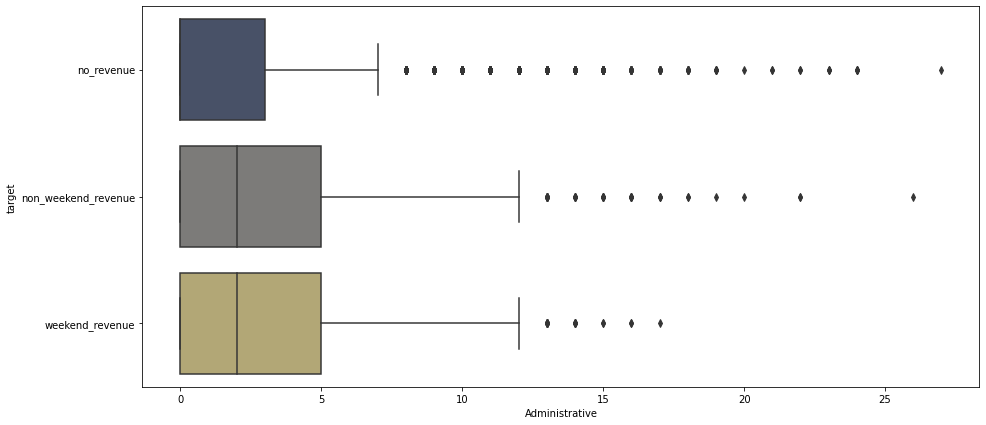

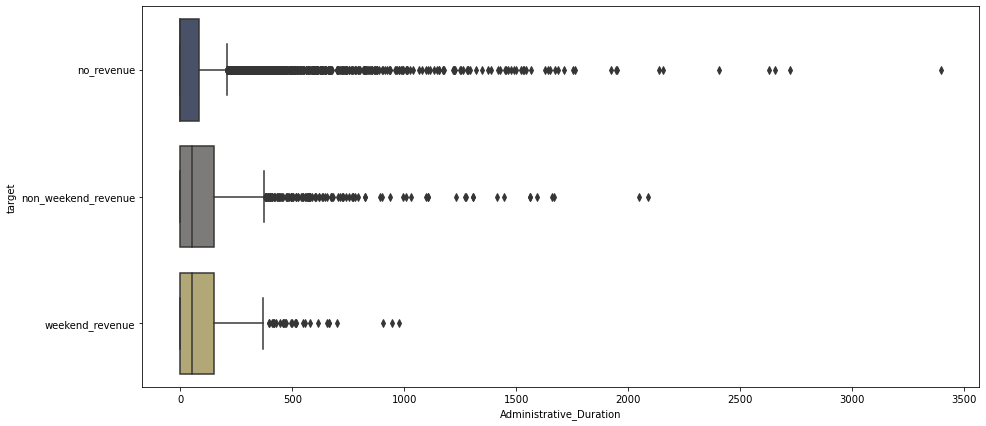

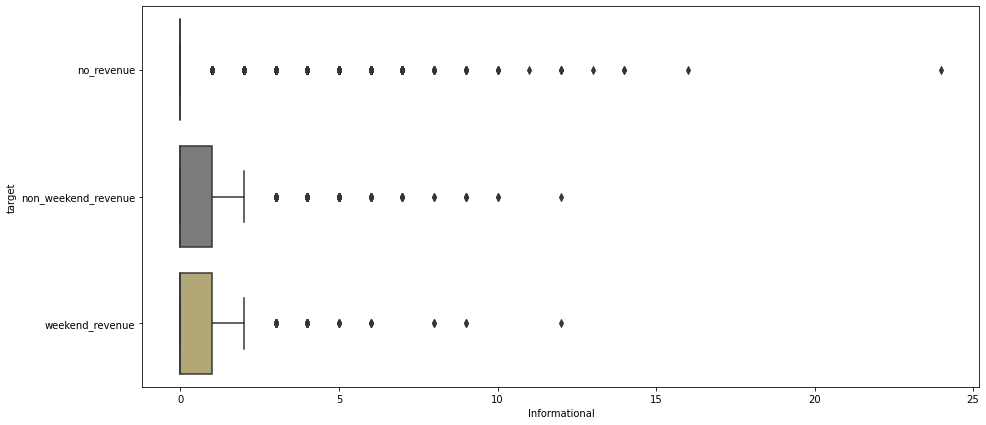

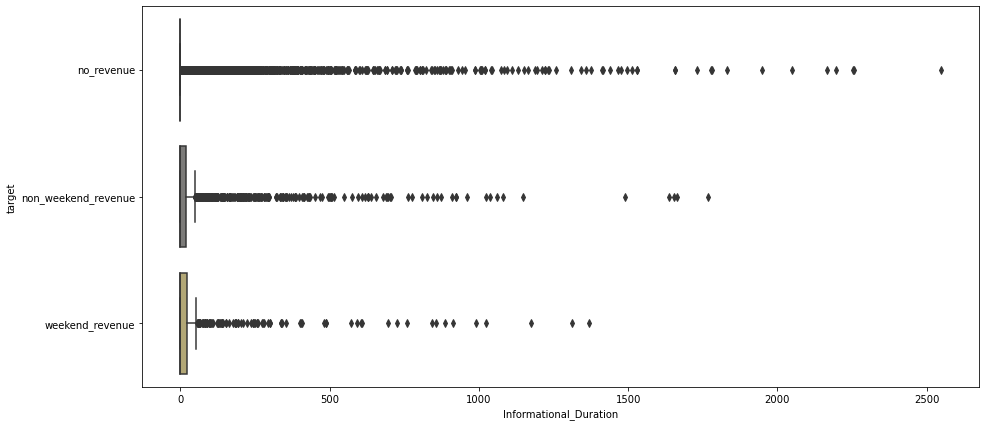

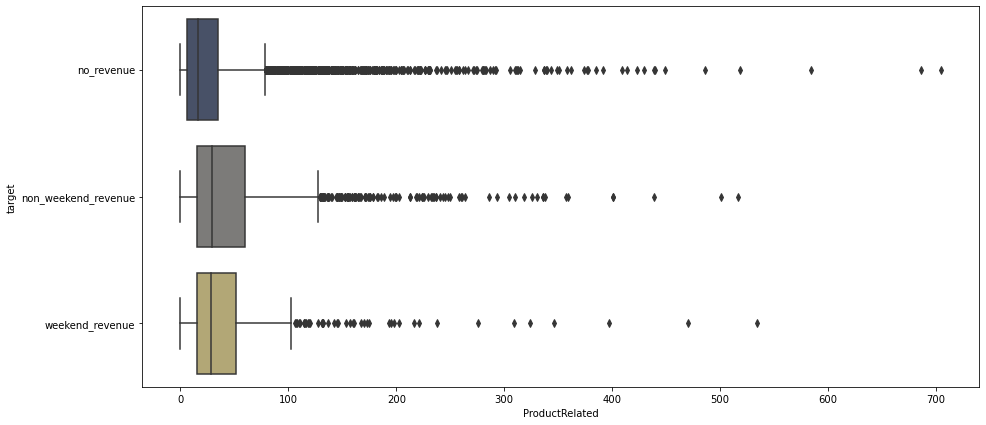

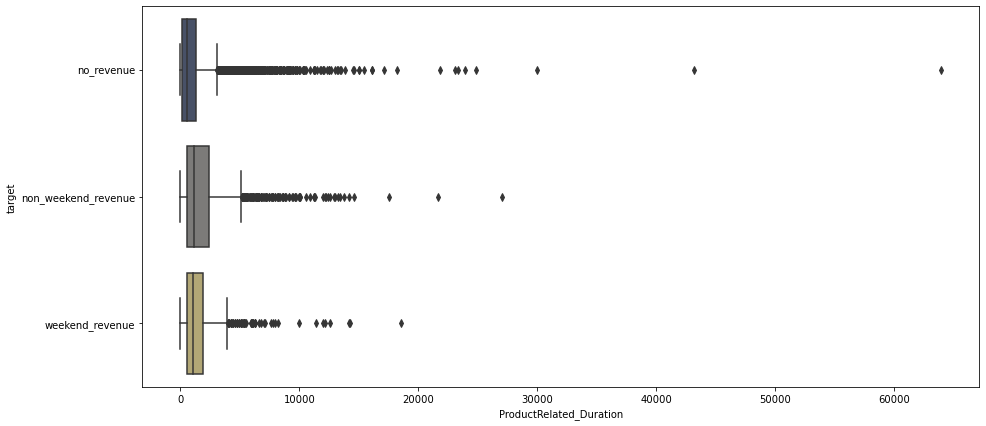

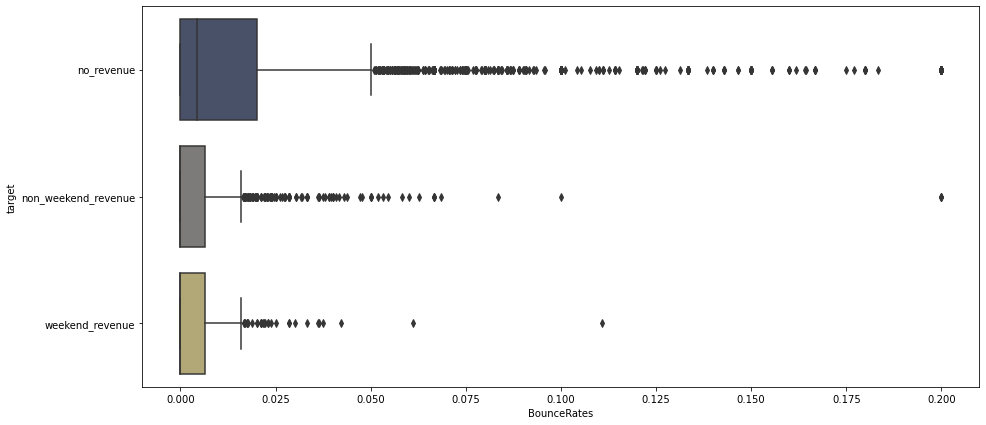

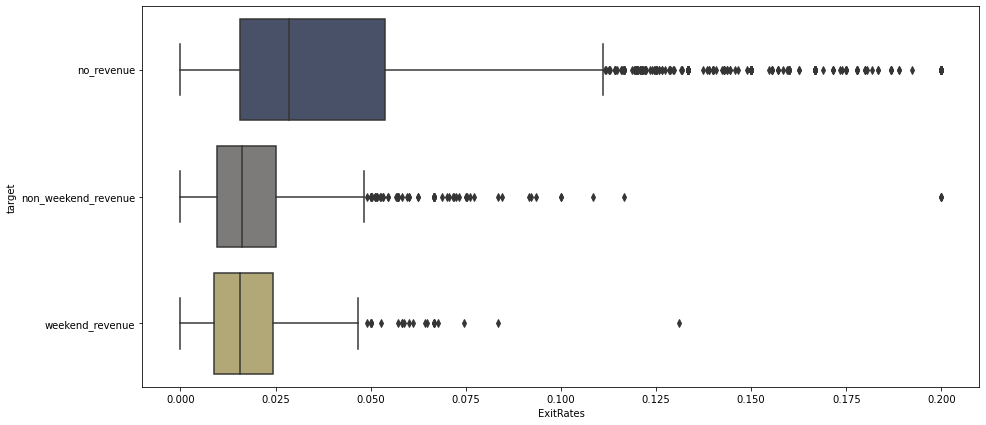

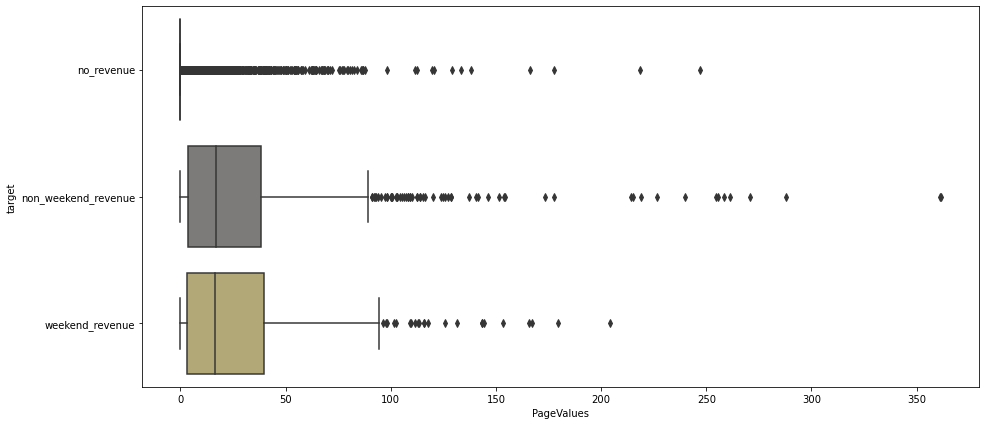

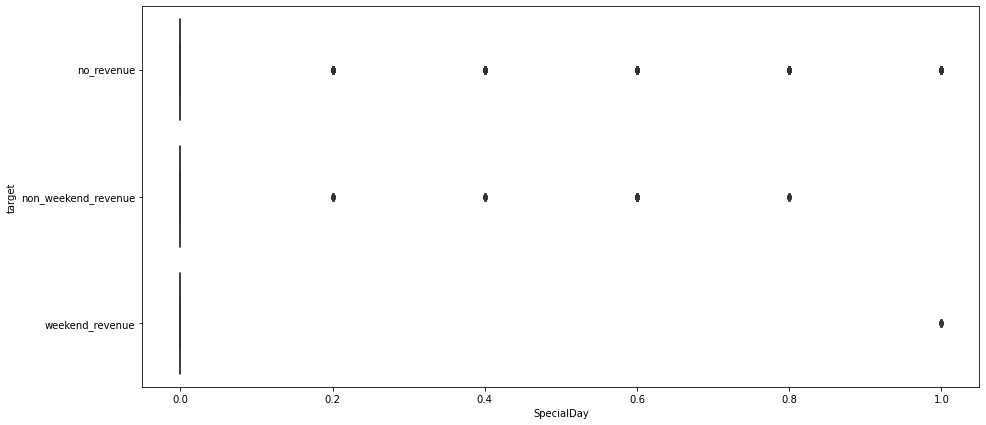

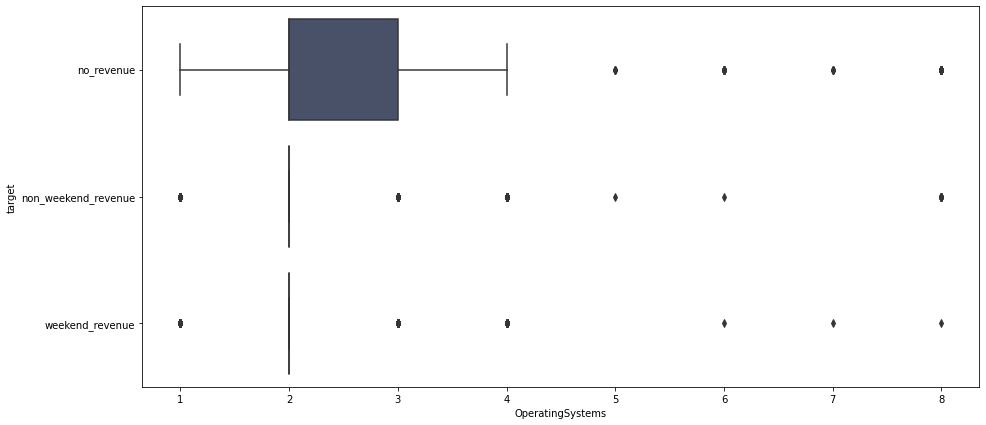

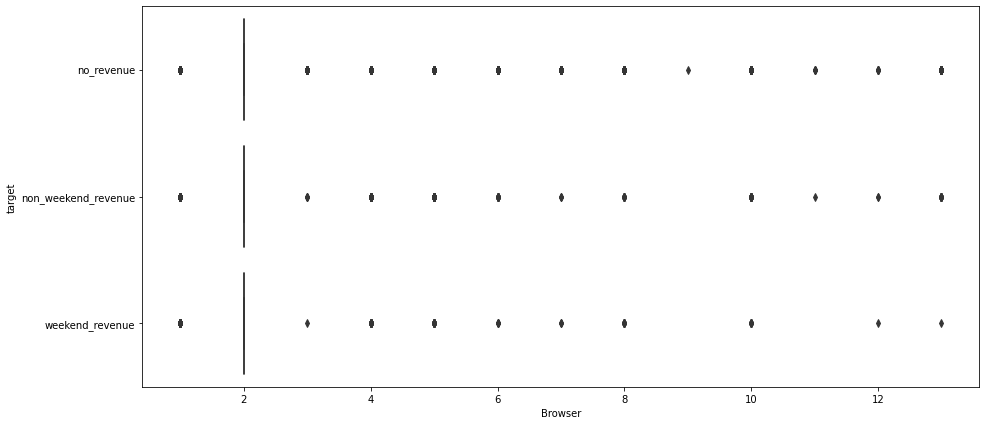

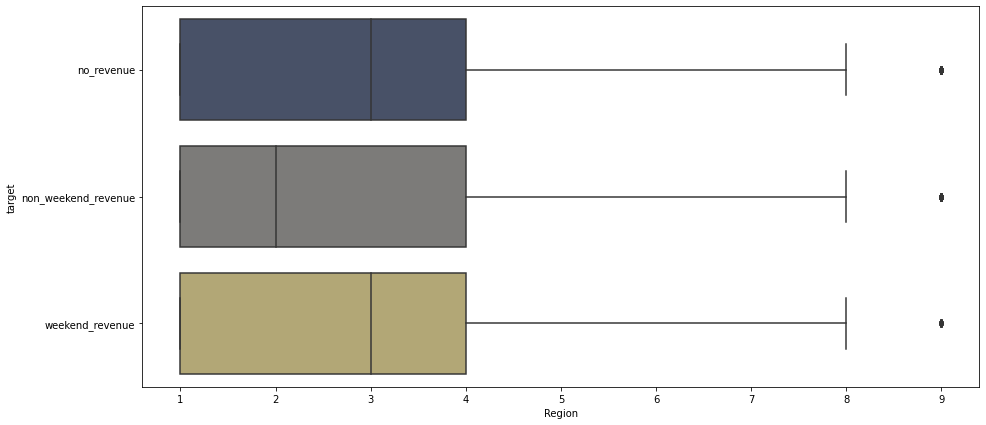

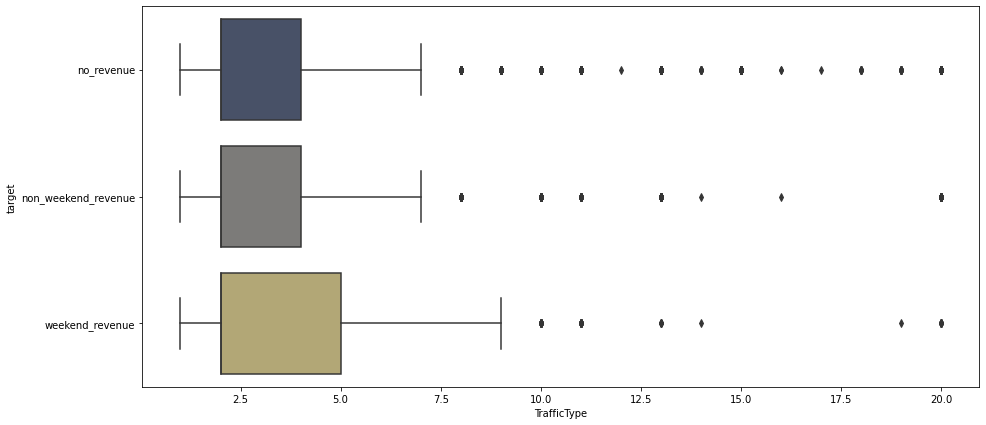

In [13]:
for i in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize =(15,7))
    sns.boxplot(y='target',x=i,data=df, palette='cividis')
    plt.show()

### Categoric Analysis

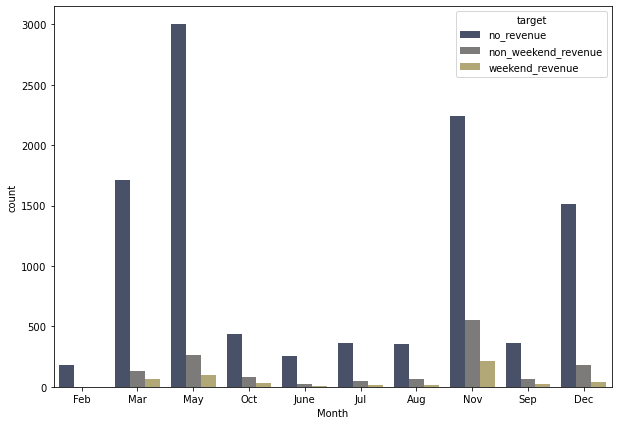

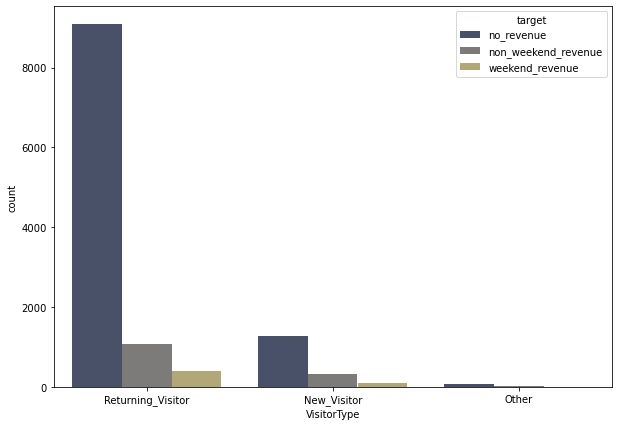

In [14]:
for i in df.select_dtypes(include=np.object).drop(['Weekend','Revenue', 'target'],axis=1).columns:
    plt.figure(figsize =(10,7))
    sns.countplot(df[i],hue=df['target'], palette='cividis')
    plt.show()

## Correlation plot

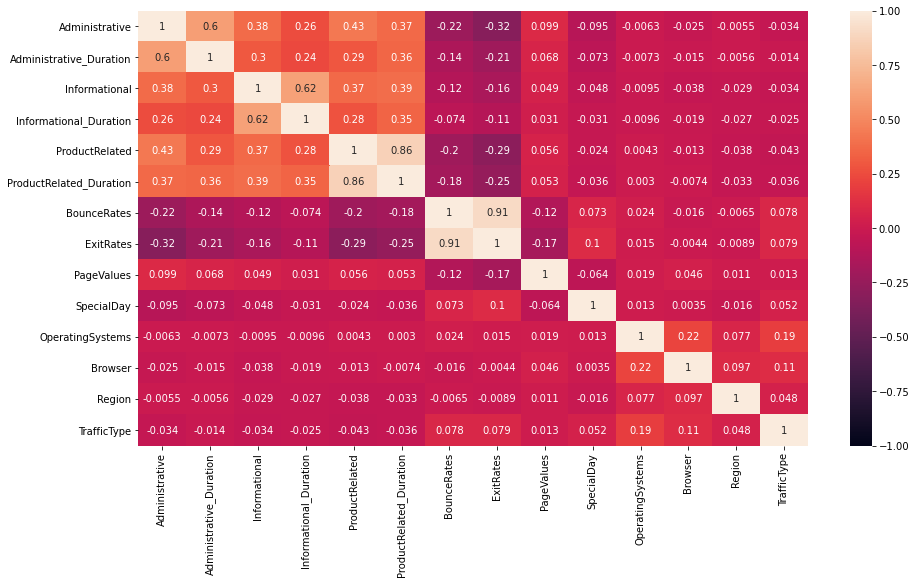

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True, vmax=1, vmin=-1)
plt.show()

### Insights from correlation plot:
#### Features to be dropped:
Due to high correlation, we will drop the following columns to avoid complexity of the model:
* ExitRates
* ProductRelated_Duration

#### Target variable Informational_Duration:
* There are multiple columns that show less that 0.1 correlation wrt the target variable, which might be dropped during prediction of Informational_Duration

In [17]:
drop_column=['ExitRates', 'ProductRelated_Duration']
df.drop(drop_column,axis=1,inplace=True)

# Data Preparation

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train,test=train_test_split(df, train_size=0.7,random_state=5)
train.shape,test.shape

((8631, 17), (3699, 17))

## Encoding

Since no columns have an inherent hierarchy hence, we will nominally encode the categorical data using Label Encoder

In [21]:
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])

In [22]:
train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,target
10350,5,613.500000,0,0.0,470,0.000000,13.381494,0.0,7,4,2,9,2,2,1,1,2
11646,3,13.333333,4,68.5,72,0.002747,0.000000,0.0,7,2,2,3,2,2,0,0,0
8865,0,0.000000,0,0.0,3,0.066667,0.000000,0.0,7,2,2,1,3,2,0,0,0
2683,0,0.000000,0,0.0,0,0.200000,0.000000,0.0,6,3,2,3,18,2,1,0,0
5634,5,148.500000,0,0.0,25,0.007692,0.000000,0.0,8,4,1,9,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0.000000,0,0.0,44,0.060000,0.000000,0.6,6,3,2,1,13,2,0,0,0
9917,0,0.000000,0,0.0,2,0.000000,0.000000,0.0,7,3,2,1,10,2,0,0,0
4079,0,0.000000,0,0.0,3,0.066667,0.000000,0.0,6,2,2,2,3,2,1,0,0
2254,3,77.000000,5,243.0,127,0.000256,0.000000,0.0,6,2,2,4,3,2,0,0,0


In [23]:
train.target.value_counts()

0    7280
1    1005
2     346
Name: target, dtype: int64

## X-Y Split

Since we have three types of predictions(Weekend, Revenue and Informational_Duration) to make hence we will split our operations into three branches from here. 

### To predict Revenue

In [24]:
xtrain_rev=train.iloc[:,:-3]
ytrain_rev=train['target']
xtest_rev=test.iloc[:,:-3]
ytest_rev=test['target']
xtrain_rev.shape,ytrain_rev.shape,xtest_rev.shape,ytest_rev.shape

((8631, 14), (8631,), (3699, 14), (3699,))

### To predict Informational_Duration

In [25]:
xtrain_inf=train.drop(['target','Informational_Duration'],axis=1)
ytrain_inf=train['Informational_Duration']
xtest_inf=test.drop(['target','Informational_Duration'],axis=1)
ytest_inf=test['Informational_Duration']
xtrain_inf.shape,ytrain_inf.shape,xtest_inf.shape,ytest_inf.shape

((8631, 15), (8631,), (3699, 15), (3699,))

## Scaling

We will apply Standard Scaling on all the variable to remove the effect  of units.

### Revenue predictors

In [26]:
for i in xtrain_rev.columns:
    xtrain_arr = xtrain_rev[i].values.reshape(-1,1)
    xtest_arr = xtest_rev[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_rev[i] = ss.transform(xtrain_arr)
    xtest_rev[i] = ss.transform(xtest_arr)

### Informational_Duration predictors

In [27]:
for i in xtrain_inf.columns:
    xtrain_arr = xtrain_inf[i].values.reshape(-1,1)
    xtest_arr = xtest_inf[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_inf[i] = ss.transform(xtrain_arr)
    xtest_inf[i] = ss.transform(xtest_arr)

## Upscaling train data using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE()
xtrain_rev_smote, ytrain_rev_smote = smote.fit_resample(xtrain_rev, ytrain_rev)

In [30]:
ytrain_rev_smote.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

## Applying PCA

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
xtrain_rev_pca = pca.fit_transform(xtrain_rev)
xtest_rev_pca = pca.transform(xtest_rev)

## Feature Selection

In [33]:
xtrain_rev_fs = xtrain_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)
xtest_rev_fs = xtest_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)

PageValues                 1974.479504
ProductRelated              160.879093
BounceRates                 143.296204
Administrative              121.379535
Informational                56.690208
Administrative_Duration      56.411967
SpecialDay                   42.121140
Informational_Duration       30.656750
Browser                       4.448438
OperatingSystems              1.573167
Region                        1.025822
TrafficType                   0.232911

# Model Training (Revenue)

Since it's a classification model we'll use 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

#### Basic Data

In [35]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev, ytrain_rev)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3142
           1       0.55      0.29      0.38       404
           2       0.00      0.00      0.00       153

    accuracy                           0.87      3699
   macro avg       0.48      0.43      0.44      3699
weighted avg       0.81      0.87      0.83      3699


DECISIONTREE
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3142
           1       0.40      0.41      0.40       404
           2       0.15      0.16      0.16       153

    accuracy                           0.83      3699
   macro avg       0.49      0.49      0.49      3699
weighted avg       0.83      0.83      0.83      3699


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3142
           1       0.58      0.49      0.53       404
           2      

#### With Smote and Class_weights

In [36]:
class_weights = {0: 1, 1: 5, 2: 10}

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(class_weight=class_weights),
         'RandomForestClassifier':RandomForestClassifier(class_weight=class_weights),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3142
           1       0.36      0.38      0.37       404
           2       0.14      0.33      0.20       153

    accuracy                           0.80      3699
   macro avg       0.48      0.53      0.49      3699
weighted avg       0.85      0.80      0.83      3699


DECISIONTREE
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3142
           1       0.38      0.46      0.41       404
           2       0.19      0.26      0.22       153

    accuracy                           0.82      3699
   macro avg       0.50      0.54      0.52      3699
weighted avg       0.85      0.82      0.83      3699


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3142
           1       0.44      0.61      0.51       404
           2      

### Smote with Feature selection

In [37]:
#class_weights = {0: 1, 1: 5, 2: 10}

xtrain_rev_smote_fs = xtrain_rev_smote.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)
xtest_rev_fs = xtest_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote_fs, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev_fs)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3142
           1       0.37      0.36      0.36       404
           2       0.15      0.39      0.22       153

    accuracy                           0.80      3699
   macro avg       0.49      0.54      0.50      3699
weighted avg       0.85      0.80      0.83      3699


DECISIONTREE
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3142
           1       0.38      0.46      0.42       404
           2       0.14      0.24      0.17       153

    accuracy                           0.81      3699
   macro avg       0.49      0.53      0.50      3699
weighted avg       0.85      0.81      0.83      3699


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3142
           1       0.44      0.59      0.50       404
           2      

#### PCA

In [38]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_pca, ytrain_rev)
    ypred_rev = model.predict(xtest_rev_pca)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3142
           1       0.33      0.02      0.04       404
           2       0.00      0.00      0.00       153

    accuracy                           0.85      3699
   macro avg       0.39      0.34      0.32      3699
weighted avg       0.76      0.85      0.78      3699


DECISIONTREE
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3142
           1       0.16      0.19      0.17       404
           2       0.10      0.09      0.10       153

    accuracy                           0.75      3699
   macro avg       0.38      0.38      0.38      3699
weighted avg       0.76      0.75      0.75      3699


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3142
           1       0.25      0.09      0.13       404
           2      

#### Feature selection

In [39]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_fs, ytrain_rev)
    ypred_rev = model.predict(xtest_rev_fs)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3142
           1       0.55      0.30      0.39       404
           2       0.00      0.00      0.00       153

    accuracy                           0.87      3699
   macro avg       0.48      0.43      0.44      3699
weighted avg       0.81      0.87      0.84      3699


DECISIONTREE
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3142
           1       0.43      0.42      0.43       404
           2       0.15      0.16      0.15       153

    accuracy                           0.84      3699
   macro avg       0.50      0.50      0.50      3699
weighted avg       0.84      0.84      0.84      3699


RANDOMFORESTCLASSIFIER
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3142
           1       0.56      0.48      0.51       404
           2      

rf 50, 04
xg 48, 09

rf 51, 08
xg 49, 08

-- added specialdays
rf 52, 06
xg 49, 07
-- added informational
rf 53, 03
xg 54, 13

# BSET F1
52, 22 -- RFClassifier -- SMOTE WITH CLASS_WEIGHTS


In [40]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate the features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Encoding
categorical_columns = X.select_dtypes(include='object').columns.tolist()
encoded_data = pd.get_dummies(X, columns=categorical_columns)
X_encoded = encoded_data.copy()
X_encoded.columns = encoded_data.columns

# Calculate ANOVA F-values for numeric columns
numeric_columns = X.select_dtypes(include=np.number).columns
anova_scores = pd.Series(index=numeric_columns)
for col in numeric_columns:
    f_value, _ = f_oneway(*(X_encoded.loc[y == cls, col] for cls in y.unique()))
    anova_scores[col] = f_value

# Calculate chi-square statistics and p-values for encoded categorical columns
chi2_scores = pd.Series(index=encoded_data.columns)
p_values = pd.Series(index=encoded_data.columns)
for col in encoded_data.columns:
    cross_tab = pd.crosstab(X_encoded[col], y)
    chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)
    chi2_scores[col] = chi2_stat
    p_values[col] = p_value

# Sort the scores in descending order
anova_scores = anova_scores.sort_values(ascending=False)
chi2_scores = chi2_scores.sort_values(ascending=False)
p_values = p_values.sort_values()

# Print the top relevant numeric and categorical columns
top_numeric_columns = anova_scores.index
top_categorical_columns = chi2_scores.index
print("Top Numeric Columns:")
print(anova_scores)
print("\nTop Categorical Columns (based on Chi-square test):")
print(chi2_scores)
print("\nP-values:")
print(p_values)


Top Numeric Columns:
PageValues                 1974.479504
ProductRelated              160.879093
BounceRates                 143.296204
Administrative              121.379535
Informational                56.690208
Administrative_Duration      56.411967
SpecialDay                   42.121140
Informational_Duration       30.656750
Browser                       4.448438
OperatingSystems              1.573167
Region                        1.025822
TrafficType                   0.232911
dtype: float64

Top Categorical Columns (based on Chi-square test):
PageValues                       19354.959336
Revenue_True                     12330.000000
Revenue_False                    12330.000000
Administrative_Duration           9749.865317
BounceRates                       4538.258577
Informational_Duration            4016.052483
Weekend_True                      2074.997904
Weekend_False                     2074.997904
ProductRelated                    1512.300311
Administrative               

# Df_downsampled

In [41]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = 'no_revenue'
minority_classes = ['non_weekend_revenue', 'weekend_revenue']

# Downsample the majority class
df_majority = df[df['target'] == majority_class]
df_minority = df[df['target'].isin(minority_classes)]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display the value counts of the downsampled target variable
print(df_downsampled['target'].value_counts())


no_revenue             1908
non_weekend_revenue    1409
weekend_revenue         499
Name: target, dtype: int64


In [42]:
df_downsampled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,target
8872,4,95.750000,12,886.25,154,0.003765,0.000000,0.0,Nov,3,2,6,2,Returning_Visitor,True,False,no_revenue
10359,0,0.000000,0,0.00,3,0.000000,0.000000,0.0,Dec,1,1,2,2,Returning_Visitor,False,False,no_revenue
6367,3,356.600000,0,0.00,39,0.001282,0.000000,0.0,Jul,1,1,4,4,Returning_Visitor,False,False,no_revenue
6262,0,0.000000,0,0.00,113,0.004805,0.000000,0.0,Jul,2,2,1,13,Returning_Visitor,False,False,no_revenue
1109,0,0.000000,0,0.00,5,0.000000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False,no_revenue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,0.002041,97.860836,0.0,Nov,2,2,1,3,Returning_Visitor,True,True,weekend_revenue
12276,7,139.575000,0,0.00,30,0.000000,36.392861,0.0,Dec,2,10,1,2,New_Visitor,False,True,non_weekend_revenue
12311,1,0.000000,2,211.25,144,0.001361,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True,non_weekend_revenue
12312,7,150.357143,1,9.00,221,0.011149,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True,weekend_revenue


In [43]:
train,test=train_test_split(df_downsampled, train_size=0.7,random_state=5)
train.shape,test.shape

((2671, 17), (1145, 17))

In [44]:
# Encoding
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])

In [45]:
# X-Y split
xtrain_rev=train.iloc[:,:-3]
ytrain_rev=train['target']
xtest_rev=test.iloc[:,:-3]
ytest_rev=test['target']
xtrain_rev.shape,ytrain_rev.shape,xtest_rev.shape,ytest_rev.shape

((2671, 14), (2671,), (1145, 14), (1145,))

In [46]:
# Scaling
for i in xtrain_rev.columns:
    xtrain_arr = xtrain_rev[i].values.reshape(-1,1)
    xtest_arr = xtest_rev[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_rev[i] = ss.transform(xtrain_arr)
    xtest_rev[i] = ss.transform(xtest_arr)

In [47]:
smote = SMOTE()
xtrain_rev_smote, ytrain_rev_smote = smote.fit_resample(xtrain_rev, ytrain_rev)

In [48]:
ytrain_rev_smote.value_counts(normalize=True)

1    0.333333
2    0.333333
0    0.333333
Name: target, dtype: float64

In [49]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev, ytrain_rev)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       564
           1       0.68      0.67      0.68       430
           2       0.00      0.00      0.00       151

    accuracy                           0.71      1145
   macro avg       0.47      0.53      0.50      1145
weighted avg       0.61      0.71      0.65      1145


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       564
           1       0.58      0.57      0.57       430
           2       0.21      0.05      0.08       151

    accuracy                           0.62      1145
   macro avg       0.48      0.48      0.46      1145
weighted avg       0.57      0.62      0.59      1145


DECISIONTREE
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       564
           1       0.60      0.57      0.58       430
           2       0.26   

In [50]:
class_weights = {0: 1, 1: 5, 2: 10}

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       564
           1       0.66      0.43      0.52       430
           2       0.21      0.33      0.26       151

    accuracy                           0.64      1145
   macro avg       0.55      0.55      0.54      1145
weighted avg       0.66      0.64      0.64      1145


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       564
           1       0.54      0.47      0.50       430
           2       0.22      0.38      0.28       151

    accuracy                           0.55      1145
   macro avg       0.50      0.51      0.49      1145
weighted avg       0.60      0.55      0.57      1145


DECISIONTREE
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       564
           1       0.61      0.63      0.62       430
           2       0.27   

In [51]:
#class_weights = {0: 1, 1: 5, 2: 10}

xtrain_rev_smote_fs = xtrain_rev_smote.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)
xtest_rev_fs = xtest_rev.drop(['Browser','OperatingSystems','Region','TrafficType'], axis = 1)

models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev_smote_fs, ytrain_rev_smote)
    ypred_rev = model.predict(xtest_rev_fs)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       564
           1       0.67      0.43      0.53       430
           2       0.23      0.36      0.28       151

    accuracy                           0.64      1145
   macro avg       0.56      0.55      0.54      1145
weighted avg       0.67      0.64      0.64      1145


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       564
           1       0.56      0.47      0.51       430
           2       0.20      0.32      0.25       151

    accuracy                           0.59      1145
   macro avg       0.52      0.52      0.51      1145
weighted avg       0.63      0.59      0.61      1145


DECISIONTREE
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       564
           1       0.61      0.58      0.60       430
           2       0.26   

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate the features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Encoding
categorical_columns = X.select_dtypes(include='object').columns.tolist()
encoded_data = pd.get_dummies(X, columns=categorical_columns)
X_encoded = encoded_data.copy()
X_encoded.columns = encoded_data.columns

# Calculate ANOVA F-values for numeric columns
numeric_columns = X.select_dtypes(include=np.number).columns
anova_scores = pd.Series(index=numeric_columns)
for col in numeric_columns:
    f_value, _ = f_oneway(*(X_encoded.loc[y == cls, col] for cls in y.unique()))
    anova_scores[col] = f_value

# Calculate chi-square statistics and p-values for encoded categorical columns
chi2_scores = pd.Series(index=encoded_data.columns)
p_values = pd.Series(index=encoded_data.columns)
for col in encoded_data.columns:
    cross_tab = pd.crosstab(X_encoded[col], y)
    chi2_stat, p_value, _, _ = chi2_contingency(cross_tab)
    chi2_scores[col] = chi2_stat
    p_values[col] = p_value

# Sort the scores in descending order
anova_scores = anova_scores.sort_values(ascending=False)
chi2_scores = chi2_scores.sort_values(ascending=False)
p_values = p_values.sort_values()

# Print the top relevant numeric and categorical columns
top_numeric_columns = anova_scores.index
top_categorical_columns = chi2_scores.index
print("Top Numeric Columns:")
print(anova_scores)
print("\nTop Categorical Columns (based on Chi-square test):")
print(chi2_scores)
print("\nP-values:")
print(p_values)


Top Numeric Columns:
PageValues                 1974.479504
ProductRelated              160.879093
BounceRates                 143.296204
Administrative              121.379535
Informational                56.690208
Administrative_Duration      56.411967
SpecialDay                   42.121140
Informational_Duration       30.656750
Browser                       4.448438
OperatingSystems              1.573167
Region                        1.025822
TrafficType                   0.232911
dtype: float64

Top Categorical Columns (based on Chi-square test):
PageValues                       19354.959336
Revenue_True                     12330.000000
Revenue_False                    12330.000000
Administrative_Duration           9749.865317
BounceRates                       4538.258577
Informational_Duration            4016.052483
Weekend_True                      2074.997904
Weekend_False                     2074.997904
ProductRelated                    1512.300311
Administrative               

# DF_upsampled

In [53]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = 'no_revenue'
minority_classes = ['non_weekend_revenue', 'weekend_revenue']

# Downsample the majority class
df_majority = df[df['target'] == majority_class]
df_minority = df[df['target'].isin(minority_classes)]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))

# Upsample the minority classes
df_minority_upsampled = pd.concat([
    resample(df_minority[df_minority['target'] == cls], replace=True, n_samples=len(df_majority_downsampled))
    for cls in minority_classes
])

# Combine the downsampled majority class with the upsampled minority classes
df_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled])

# Display the value counts of the balanced target variable
print(df_balanced['target'].value_counts())


no_revenue             1908
weekend_revenue        1908
non_weekend_revenue    1908
Name: target, dtype: int64


In [54]:
df_balanced

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,target
7789,8,375.120000,0,0.00,13,0.000000,0.000000,0.0,Sep,3,2,4,3,New_Visitor,False,False,no_revenue
3852,6,245.466667,0,0.00,57,0.006897,0.000000,0.0,May,4,2,3,6,Returning_Visitor,False,False,no_revenue
5102,9,363.875000,0,0.00,29,0.005556,0.000000,0.0,May,2,4,1,1,Returning_Visitor,False,False,no_revenue
375,0,0.000000,0,0.00,8,0.028571,0.000000,0.0,Mar,3,2,4,1,Returning_Visitor,False,False,no_revenue
4140,2,282.500000,0,0.00,17,0.062500,0.000000,0.0,May,3,2,3,13,Returning_Visitor,False,False,no_revenue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9186,0,0.000000,0,0.00,21,0.021053,23.823249,0.0,Nov,2,2,1,1,Returning_Visitor,True,True,weekend_revenue
8582,6,94.100000,0,0.00,92,0.008333,6.664928,0.0,Nov,1,1,1,2,Returning_Visitor,True,True,weekend_revenue
6091,0,0.000000,0,0.00,6,0.000000,24.918455,0.0,Oct,1,2,3,2,Returning_Visitor,True,True,weekend_revenue
11765,0,0.000000,0,0.00,42,0.021951,0.000000,0.0,Nov,1,1,1,13,Returning_Visitor,True,True,weekend_revenue


In [55]:
# TRAIN - TEST SPLIT
train,test=train_test_split(df_balanced, train_size=0.7,random_state=5)
train.shape,test.shape

# E N C O D I N G
# Encoding
for i in train.select_dtypes(exclude=np.number).columns:
    le=LabelEncoder()
    le.fit(train[i])
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])
    
# X-Y split
xtrain_rev=train.iloc[:,:-3]
ytrain_rev=train['target']
xtest_rev=test.iloc[:,:-3]
ytest_rev=test['target']
xtrain_rev.shape,ytrain_rev.shape,xtest_rev.shape,ytest_rev.shape


# Scaling
for i in xtrain_rev.columns:
    xtrain_arr = xtrain_rev[i].values.reshape(-1,1)
    xtest_arr = xtest_rev[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain_rev[i] = ss.transform(xtrain_arr)
    xtest_rev[i] = ss.transform(xtest_arr)

In [56]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
          'KNN_Classifier': KNeighborsClassifier(n_neighbors=5),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
          'Adaboost': AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain_rev, ytrain_rev)
    ypred_rev = model.predict(xtest_rev)
    
    print(name.upper())
    print(classification_report(ytest_rev, ypred_rev))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       556
           1       0.53      0.32      0.40       599
           2       0.48      0.53      0.50       563

    accuracy                           0.56      1718
   macro avg       0.55      0.57      0.55      1718
weighted avg       0.55      0.56      0.55      1718


KNN_CLASSIFIER
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       556
           1       0.65      0.57      0.61       599
           2       0.63      0.75      0.69       563

    accuracy                           0.65      1718
   macro avg       0.66      0.66      0.65      1718
weighted avg       0.66      0.65      0.65      1718


DECISIONTREE
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       556
           1       0.86      0.81      0.83       599
           2       0.83   